In [4]:
# 1. Clone della repository e installazione delle librerie
!git clone https://github.com/leonardoCosta02/Hawk-AI-CV-Project.git
# Esempio: !git clone https://github.com/GruppoCV/Hawk-AI-CV-Project.git

# Entra nella cartella di progetto e aggiungila al PATH di Python
import os
repo_name = "Hawk-AI-CV-Project" # Sostituisci con il nome del tuo repository
os.chdir(repo_name)

import sys
sys.path.insert(0, os.getcwd())

# Installa OpenCV (se non è già presente, Colab la ha) e Matplotlib
!pip install numpy opencv-python matplotlib

print("Setup completato. Sei nella cartella:", os.getcwd())

Cloning into 'Hawk-AI-CV-Project'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 51 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 473.61 KiB | 977.00 KiB/s, done.
Resolving deltas: 100% (5/5), done.
Setup completato. Sei nella cartella: /content/Hawk-AI-CV-Project/Hawk-AI-CV-Project


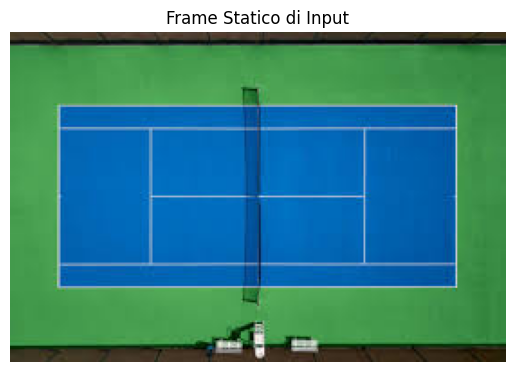

In [5]:
# Importa la tua funzione dal modulo
from src.court_features import trova_linee

# Importa le librerie per la visualizzazione
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Percorso del frame statico (assicurati che il file sia in data/)
FRAME_PATH = 'data/static_images/static_court_frame_cemento.jpg'

# Carica l'immagine (OpenCV legge come BGR)
image_bgr = cv.imread(FRAME_PATH)

if image_bgr is None:
    print(f"ERRORE: Impossibile caricare l'immagine da {FRAME_PATH}. Assicurati che esista!")
else:
    # Per la visualizzazione in matplotlib è necessaria la conversione BGR -> RGB
    image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Frame Statico di Input")
    plt.axis('off')
    plt.show()

La tua funzione ha rilevato: 17 linee.


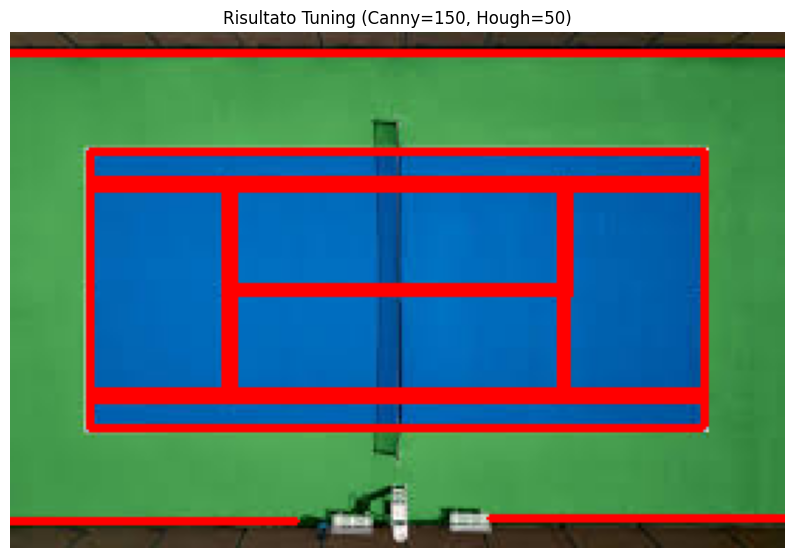


Output grezzo per il Membro 3 (prime 5 linee):
[[ 28  42 246  42]
 [ 28  52 246  52]
 [ 28  55 246  55]
 [ 28 140 245 140]
 [ 28 127 246 127]]


In [6]:
# --- PARAMETRI DA TUNARE SPERIMENTALMENTE ---
# Scegli dei valori iniziali e osservane l'effetto

# Parametri Canny (edge detection):
CANNY_LOW = 50
CANNY_HIGH = 150 # I bordi sono rilevati tra 50 e 150, solo quelli oltre 150 sono certi.

# Parametri Hough (line detection):
HOUGH_THRESHOLD = 50    # Numero minimo di intersezioni per considerare una linea (abbassa per trovare più linee)
HOUGH_MIN_LENGTH = 30   # Lunghezza minima in pixel di un segmento di linea
HOUGH_MAX_GAP = 10      # Distanza massima per unire due segmenti vicini

# --- ESECUZIONE DELLA TUA FUNZIONE ---
raw_line_segments = trova_linee(
    image_bgr,
    canny_low_threshold=CANNY_LOW,
    canny_high_threshold=CANNY_HIGH,
    hough_threshold=HOUGH_THRESHOLD,
    hough_min_length=HOUGH_MIN_LENGTH,
    hough_max_gap=HOUGH_MAX_GAP
)

print(f"La tua funzione ha rilevato: {len(raw_line_segments)} linee.")

# --- VISUALIZZAZIONE DEI RISULTATI ---
line_frame = np.copy(image_rgb)
if raw_line_segments.size > 0:
    for x1, y1, x2, y2 in raw_line_segments:
        # Disegna la linea in ROSSO (RGB: 255, 0, 0)
        cv.line(line_frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(line_frame)
plt.title(f"Risultato Tuning (Canny={CANNY_HIGH}, Hough={HOUGH_THRESHOLD})")
plt.axis('off')
plt.show()

# --- OUTPUT FINALE (Pronto per M3) ---
print("\nOutput grezzo per il Membro 3 (prime 5 linee):")
print(raw_line_segments[:5])